# IFML, exc01
Johannes Kammerer, Claire Sun, Jocelyn

In [2]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random

## 1 Monte-Carlo Simulation

### 1.1 Data Creation and Visualization

In [62]:
def create_data(N):
    X, Y = np.zeros(N), np.zeros(N)
    for i in range(N):
        Y[i] = random.randint(2) # prior probabilities
        u = random.rand() # uniformly distributed
        if Y[i] == 0:
            X[i] = 1-u**0.5 # Inverse transform sampling of likelihood
        elif Y[i] == 1:
            X[i] = u**0.5 # symmetry
    return X, Y

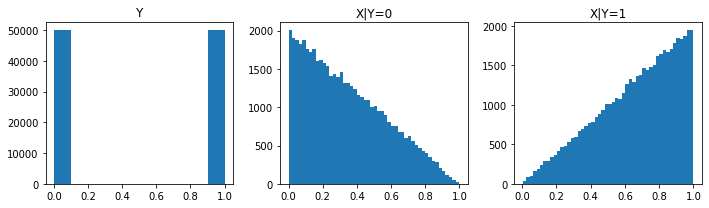

In [121]:
random.seed(1234)
X, Y = create_data(100000)
X0 = X[np.where(Y == 0)]
X1 = X[np.where(Y == 1)]

fig, ax = plt.subplots(1, 3, figsize = (10, 3), tight_layout = True)
ax[0].hist(Y)
ax[0].set_title('Y')
ax[1].hist(X0, bins = 50)
ax[1].set_title('X|Y=0')
ax[2].hist(X1, bins = 50)
ax[2].set_title('X|Y=1')
plt.show()

### 1.2 Classification by Threshold

In [142]:
def pNum(M, T, xt, cls):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        if cls == 'A':
            Yhat = 1*(X >= xt) # returns vector of Yhat
        elif cls == 'B':
            Yhat = 1*(X < xt)
        else: 
            return 0
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

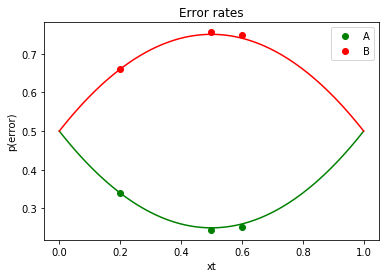

In [209]:
xtvalues = np.array([0.2, 0.5, 0.6])
pAnum = np.zeros(3)
pBnum = np.zeros(3)
for i in range(3):
    pAnum[i] = pNum(M = 10000, T = 1, xt = xtvalues[i], cls = 'A')
    pBnum[i] = pNum(M = 10000, T = 1, xt = xtvalues[i], cls = 'B')
    
xvalues = np.linspace(0, 1, 100)
def pAtheo(xt):
    return 1/4 + (xt-1/2)**2
def pBtheo(xt):
    return 3/4 - (xt-1/2)**2

plt.plot(xtvalues, pAnum, 'go', label = 'A')
plt.plot(xtvalues, pBnum, 'ro', label = 'B')
plt.plot(xvalues, pAtheo(xvalues), c = 'g')
plt.plot(xvalues, pBtheo(xvalues), c = 'r')
plt.xlabel('xt')
plt.ylabel('p(error)')
plt.title('Error rates')
plt.legend()
plt.show()

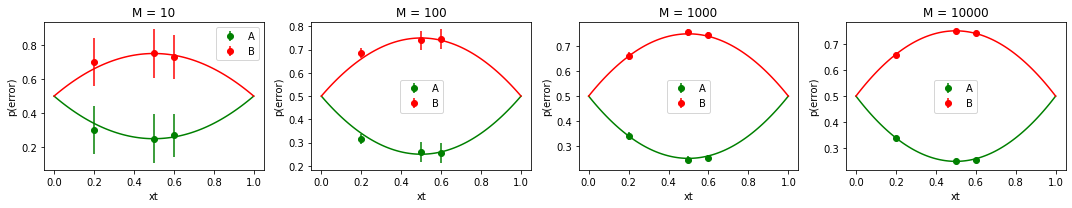

In [227]:
x = xtvalues
Mvalues = np.array([10, 100, 1000, 10000])
MpA, MpB, MstdA, MstdB = np.zeros(4), np.zeros(4), np.zeros(4), np.zeros(4)

fig, ax = plt.subplots(1, 4, figsize = (15, 3), tight_layout = True)

for m in range(4):
    x = xtvalues
    yA = [np.mean(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'A')) for i in x]
    yerrA = [np.std(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'A')) for i in x]
    MpA[m] = yA[1]
    MstdA[m] = yerrA[1]
    ax[m].errorbar(x, yA, yerr = yerrA, fmt = 'go', label = 'A')
    ax[m].plot(xvalues, pAtheo(xvalues), c = 'g')
    yB = [np.mean(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'B')) for i in x]
    yerrB = [np.std(pNum(M = Mvalues[m], T = 10, xt = i, cls = 'B')) for i in x]
    MpB[m] = yB[1]
    MstdB[m] = yerrB[1]
    ax[m].errorbar(x, yB, yerr = yerrB, fmt = 'ro', label = 'B')
    ax[m].plot(xvalues, pBtheo(xvalues), c = 'r')
    ax[m].set_title('M = %i' %Mvalues[m])
    ax[m].set_xlabel('xt')
    ax[m].set_ylabel('p(error)')
    ax[m].legend()
plt.show()

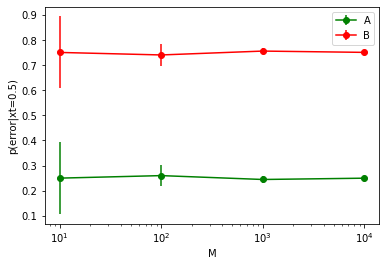

In [231]:
plt.errorbar(Mvalues, MpA, yerr = MstdA, fmt = 'go-', label = 'A')
plt.errorbar(Mvalues, MpB, yerr = MstdB, fmt = 'ro-', label = 'B')
plt.xscale('log')
plt.title('')
plt.xlabel('M')
plt.ylabel('p(error|xt=0.5)')
plt.legend()
plt.show()

### 1.3 Baseline Classifiers

In [233]:
def pnumC(M, T):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        Yhat = [random.randint(2) for i in range(M)] # Yhat in {0,1}
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

def pnumD(M, T):
    random.seed(1234)
    err = np.zeros(T)
    for i in range(T):
        X, Y = create_data(M)
        Yhat = np.ones(M)
        Ycor = 1*(Yhat == Y) # correct guesses
        err[i] = 1 - sum(Ycor)/len(Ycor) # error rate
    return err

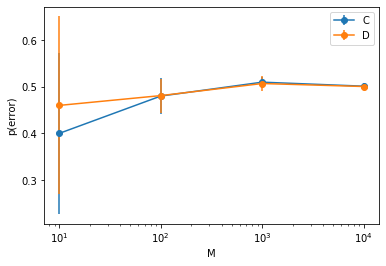

In [239]:
x = xtvalues
Mvalues = np.array([10, 100, 1000, 10000])
pC, stdC, pD, stdD = np.zeros(4), np.zeros(4), np.zeros(4), np.zeros(4)

for m in range(4):
    pC[m] = np.mean(pnumC(M = Mvalues[m], T = 10))
    stdC[m] = np.std(pnumC(M = Mvalues[m], T = 10))
    pD[m] = np.mean(pnumD(M = Mvalues[m], T = 10))
    stdD[m] = np.std(pnumD(M = Mvalues[m], T = 10))

plt.errorbar(Mvalues, pC, yerr = stdC, fmt = 'o-', label = 'C')
plt.errorbar(Mvalues, pD, yerr = stdD, fmt = 'o-', label = 'D')
plt.xscale('log')
plt.title('')
plt.xlabel('M')
plt.ylabel('p(error)')
plt.legend()
plt.show()

### 1.4 Nearest Neighbor Classification

In [306]:
def dist(a, b):
    return np.abs(a-b)

def predict(X, X0, X1):
    Yhat = np.zeros(len(X))
    for i in range(len(X)):
        Yhat[i] = 0 if dist(X[i], X0) < dist(X[i], X1) else 1 # note: equidistance to both X0 and X1 has probability 0 (continuous distribution)
    return Yhat

def perr(Yhat, Y):
    Ycor = 1*(Yhat == Y) # correct guesses
    return 1 - sum(Ycor)/len(Ycor) # error rate

def create_data_rankN(N):
    condition = True
    while(condition):
        X, Y = create_data(N)
        condition = ((X[Y == 0].size == 0) or (X[Y == 1].size == 0)) # continue loop if only one instance is present
    return X,Y

In [307]:
# N = 2
T = 100
err2 = np.zeros(T)
random.seed(1234)
for i in range(T):
    # training set
    X, Y = create_data_rankN(2)
    X0 = np.mean(X[Y == 0])
    X1 = np.mean(X[Y == 1])

    # test set
    x, y = create_data(N = 1000)
    Yhat = predict(x, X0, X1)
    err2[i] = perr(Yhat, y)

In [308]:
# N = 100
T = 100
err100 = np.zeros(T)
random.seed(1234)
for i in range(T):
    # training set
    X, Y = create_data_rankN(T)
    X0 = np.mean(X[Y == 0])
    X1 = np.mean(X[Y == 1])

    # test set
    x, y = create_data(N = 1000)
    Yhat = predict(x, X0, X1)
    err100[i] = perr(Yhat, y)

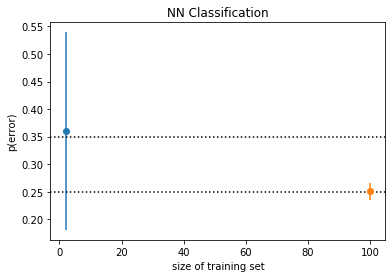

In [319]:
plt.errorbar(2, np.mean(err2), yerr = np.std(err2), fmt = 'o-')
plt.errorbar(100, np.mean(err100), yerr = np.std(err100), fmt = 'o-')
plt.axhline(y = 0.35, ls = ':', c = 'k')
plt.axhline(y = 0.25, ls = ':', c = 'k')
plt.title('NN Classification')
plt.xlabel('size of training set')
plt.ylabel('p(error)')
plt.show()